In [1]:
import requests
import json
import matplotlib.pyplot as plt

In [2]:
# creating states, dates and satistics values list

response = requests.get("https://api.covidtracking.com/v1/states/daily.json")
datainjson = json.loads(response.text.lower())
stateslist=[]
dateslist=[]
keyslist=[]
for a in datainjson:
  if a['state'] in stateslist:
    continue
  else:
    stateslist.append(a['state'])

for a in datainjson:
  if a['date'] in dateslist:
    continue
  else:
    dateslist.append(a['date'])

for b in datainjson[0].keys():
  keyslist.append(b)

Please enter the first two initials of state that you would like to search for : CA
Please enter the statistic that you want to search for : positive
Would you like to add a start date (yes / no)? yes
Please enter the start date in YYYYMMDD format : 20200401
Would you like to add an end date (yes / no)? yes
Please enter the end date in YYYYMMDD format : 20200404

Coronivirus positive in CA from 20200401 to 20200404

20200404  :  12026
20200403  :  10701
20200402  :  9191
20200401  :  8155




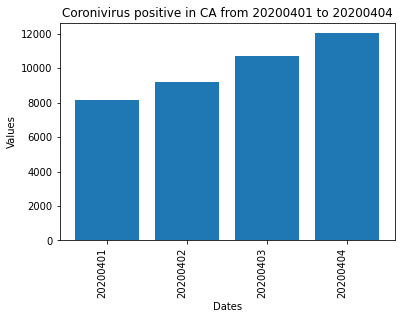

Please enter 'YES' if you would like to repeat this exercise : YES
Please enter the first two initials of state that you would like to search for : Yogesh

Please check the initials of the state!

Please enter 'YES' if you would like to repeat this exercise : Yes
Please enter the first two initials of state that you would like to search for : NY
Please enter the statistic that you want to search for : totaltestresults
Would you like to add a start date (yes / no)? no
Would you like to add an end date (yes / no)? no

Our Analytics can show data of maximum 4 months!
We will be showing the average values of 5 days for the given period!


Coronivirus totaltestresults in NY from 20200113 to 20200512

20200512  :  1225113
20200511  :  1204650
20200510  :  1182998
20200509  :  1153768
20200508  :  1121543
20200507  :  1089916
20200506  :  1055921
20200505  :  1028899
20200504  :  1007310
20200503  :  985911
20200502  :  959017
20200501  :  927438
20200430  :  900636
20200429  :  872481
202004

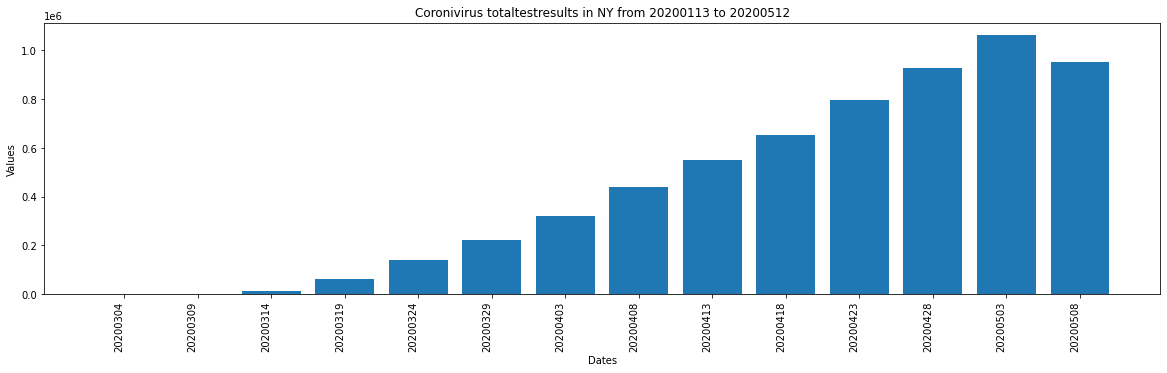

Please enter 'YES' if you would like to repeat this exercise : yes
Please enter the first two initials of state that you would like to search for : WA
Please enter the statistic that you want to search for : Yogesh

Statistic word not available in data. Please input another statistic word for analytics.

Please enter 'YES' if you would like to repeat this exercise : Yes
Please enter the first two initials of state that you would like to search for : WA
Please enter the statistic that you want to search for : positiveincrease
Would you like to add a start date (yes / no)? yes
Please enter the start date in YYYYMMDD format : 20201220
Would you like to add an end date (yes / no)? no

Coronivirus positiveincrease in WA from 20201220 to 20210307

20210307  :  664
20210306  :  778
20210305  :  854
20210304  :  795
20210303  :  733
20210302  :  935
20210301  :  0
20210228  :  951
20210227  :  1169
20210226  :  1088
20210225  :  872
20210224  :  731
20210223  :  1168
20210222  :  0
20210221  :

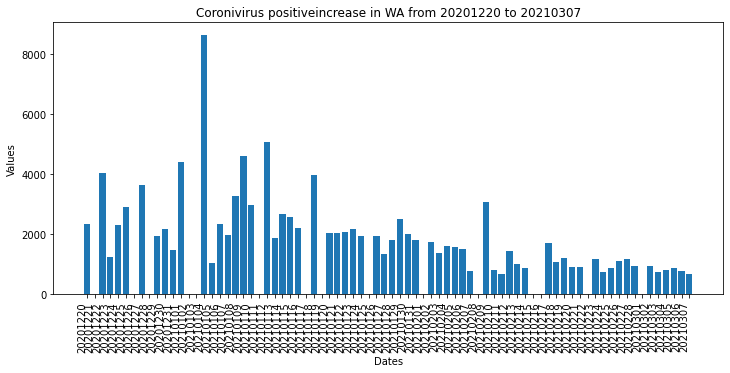

Please enter 'YES' if you would like to repeat this exercise : No


In [4]:
# Program for covid related state based data analytics

response = requests.get("https://api.covidtracking.com/v1/states/daily.json")
if response.status_code == 200:
  data = json.loads(response.text.lower())
  repeat = 'yes'
  while repeat == 'yes':
    # setting default start and end dates
    start_date = 20200113
    end_date = 20210307
    state = input("Please enter the first two initials of state that you would like to search for : ").lower()
    
    # check condition if state value by user is a valid option or not
    if state in stateslist:
      key = input("Please enter the statistic that you want to search for : ").lower()
      
      # check condition if statistic value entered  by user is valid or not
      if key in keyslist:
        start_date_condition = input("Would you like to add a start date (yes / no)? ").lower()
        
        # getting user input for start date or else setting it to default
        if start_date_condition == 'yes':
          start_date = int(input("Please enter the start date in YYYYMMDD format : "))
          if start_date > 20210307:
            print("\nSorry, API data is available only upto March 7th of 2021.\nHence start date set to 20210307\n.")
            start_date = 20210307
        
        # getting user input for the end date or else setting it to default
        end_date_condition = input("Would you like to add an end date (yes / no)? ").lower()
        if end_date_condition == 'yes':
          end_date = int(input("Please enter the end date in YYYYMMDD format : "))
          if end_date > 20210307:
            print("\nSorry, API data is available only upto March 7th of 2021.\nHence end date set to 20210307\n.")
            end_date = 20210307
          elif end_date < start_date:
            print("\nEnd date cannot be before Start date!\n")
            end_date = 20210307

        # updating  for entries of only 4 months
        if dateslist.index(start_date) - dateslist.index(end_date) > 120:
          end_date = dateslist[(dateslist.index(start_date)) - 120]
          print("\nOur Analytics can show data of maximum 4 months!\nWe will be showing the average values of 5 days for the given period!\n")

        # fetching the required data for analytics
        xlist = []
        ylist = []
        ctitle = "Coronivirus " + key + " in " + state.upper() + " from " + str(start_date) + " to " + str(end_date)
        print('\n' + ctitle + '\n')
        unchanged_end_date = end_date
        for i in data:
          if i['state'] == state and i['date'] <= end_date and i['date'] >= start_date:
            xlist.append(str(i['date']))
            if i[key] == '':
              number = 0
            else:
              number = i[key]
            ylist.append(number)
            end_date = end_date - 1
            print(i['date']," : ",i[key] )

        final_xlist=[]
        final_ylist=[]
        
        # code to display average value of 5 days when no of days is very large
        if dateslist.index(start_date) - dateslist.index(unchanged_end_date) == 120:
          count = 1
          value = 0
          for j in ylist:
            value += j
            count += 1
            if count % 5 == 0:
              final_ylist.append(int(value/5))
              final_xlist.append(xlist[(count - 1)])
              value = 0
            
        else:
          final_xlist = xlist[:]
          final_ylist = ylist[:]

        # plotting the graph
        final_xlist.reverse()
        final_ylist.reverse()
        
        plt.bar(final_xlist,final_ylist)
        plt.xticks(rotation = 90, ha = "right")
        
        if dateslist.index(start_date) - dateslist.index(unchanged_end_date) >= 120:
          plt.gcf().set_size_inches(20,5)
        elif dateslist.index(start_date) - dateslist.index(unchanged_end_date) >= 90:
          plt.gcf().set_size_inches(16,5)
        elif dateslist.index(start_date) - dateslist.index(unchanged_end_date) >= 60:
          plt.gcf().set_size_inches(12,5)
        else:
          plt.gcf().set_size_inches(6,4)

        plt.title(ctitle)
        plt.xlabel("Dates")
        plt.ylabel("Values")
        print('\n')
        plt.show()

      else:
        print("\nStatistic word not available in data. Please input another statistic word for analytics.\n")

    else:
      print("\nPlease check the initials of the state!\n")

    repeat = input("Please enter 'YES' if you would like to repeat this exercise : ").lower()
else:
  print("Connection Error. Please try again later. ")